In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
train_df = pd.read_csv("../data/ais_train.csv", sep="|")
vessels_df = pd.read_csv("../data/vessels.csv", sep="|")
vessels_df

,shippingLineId,vesselId,CEU,DWT,GT,NT,vesselType,breadth,depth,draft,enginePower,freshWater,fuel,homePort,length,maxHeight,maxSpeed,maxWidth,rampCapacity,yearBuilt
0,61a8e672f9cba188601e84ab,61e9f38eb937134a3c4bfd8b,6500,21200.0,58684,17606.0,83.0,32.0,22.20,NaN,0.0,NaN,NaN,OSLO,199.00,5.0,18.6,15.2,150.0,2000
1,61ec94f1a8cafc0e93f0e92a,61e9f38eb937134a3c4bfd8d,4902,12325.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,MONROVIA,182.00,NaN,NaN,NaN,NaN,2006
2,61e213d5d612676a0f0fb755,61e9f38eb937134a3c4bfd8f,5000,13059.0,46800,NaN,83.0,31.0,NaN,NaN,14220.0,NaN,NaN,SAINT JOHN'S,182.00,NaN,NaN,NaN,NaN,2010
3,61be24574ea00ae59d0fe388,61e9f38eb937134a3c4bfd91,4200,12588.0,39362,NaN,83.0,28.0,NaN,NaN,11060.0,NaN,NaN,NaN,167.00,NaN,NaN,NaN,NaN,2011
4,61a8e673f9cba188601e84ae,61e9f390b937134a3c4bfd93,7450,21052.0,75528,24391.0,83.0,37.2,22.23,NaN,13140.0,491.47,3236.78,Panama,199.98,NaN,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,61a8e673f9cba188601e84ae,clh6aqawa0003gh0zu0aznvt2,6000,18770.0,59516,NaN,83.0,32.0,NaN,10.00,NaN,NaN,NaN,NaN,200.00,NaN,NaN,NaN,NaN,2014
707,61a8e673f9cba188601e84b3,clh6aqawa0004gh0z12aogec9,250,6440.0,26478,NaN,83.0,26.0,NaN,5.75,NaN,NaN,NaN,NaN,177.00,NaN,NaN,NaN,NaN,1989
708,61a8e673f9cba188601e84ae,clh6aqawa0005gh0z64y4xyip,6015,17228.0,55493,NaN,83.0,32.0,NaN,9.62,NaN,NaN,NaN,NaN,200.00,NaN,NaN,NaN,NaN,2002
709,61a8e673f9cba188601e84b3,clh6aqawa0006gh0zje911dl3,150,13800.0,23128,NaN,83.0,21.0,NaN,7.82,NaN,NaN,NaN,NaN,191.00,NaN,NaN,NaN,NaN,2007


In [19]:
vessels_df["vesselId"].unique().shape

(711,)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522065 entries, 0 to 1522064
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   time       1522065 non-null  object 
 1   cog        1522065 non-null  float64
 2   sog        1522065 non-null  float64
 3   rot        1522065 non-null  int64  
 4   heading    1522065 non-null  int64  
 5   navstat    1522065 non-null  int64  
 6   etaRaw     1522065 non-null  object 
 7   latitude   1522065 non-null  float64
 8   longitude  1522065 non-null  float64
 9   vesselId   1522065 non-null  object 
 10  portId     1520450 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 127.7+ MB


In [21]:
vessels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   shippingLineId  711 non-null    object 
 1   vesselId        711 non-null    object 
 2   CEU             711 non-null    int64  
 3   DWT             703 non-null    float64
 4   GT              711 non-null    int64  
 5   NT              187 non-null    float64
 6   vesselType      699 non-null    float64
 7   breadth         703 non-null    float64
 8   depth           242 non-null    float64
 9   draft           10 non-null     float64
 10  enginePower     691 non-null    float64
 11  freshWater      221 non-null    float64
 12  fuel            221 non-null    float64
 13  homePort        573 non-null    object 
 14  length          711 non-null    float64
 15  maxHeight       35 non-null     float64
 16  maxSpeed        213 non-null    float64
 17  maxWidth        35 non-null     flo

In [16]:
vessels_df["shippingLineId"].value_counts()

shippingLineId
61ec6303a8cafc0e93f0e8f3     79
61be24564ea00ae59d0fe37a     77
61a8e672f9cba188601e84ac     72
61a8e673f9cba188601e84ad     69
61a8e673f9cba188601e84ae     61
61be24564ea00ae59d0fe379     61
61a8e673f9cba188601e84b9     51
61ec65aea8cafc0e93f0e900     45
61a8e672f9cba188601e84ab     40
61a8e673f9cba188601e84b3     20
61ec643ca8cafc0e93f0e8f9     19
61e213d5d612676a0f0fb755     18
61a8e674f9cba188601e84c2     18
61a8e673f9cba188601e84bb     17
61be24574ea00ae59d0fe388     13
61a8e673f9cba188601e84b5     13
61a8e673f9cba188601e84ba      6
61ec94f1a8cafc0e93f0e92a      5
61be24564ea00ae59d0fe378      5
61be24564ea00ae59d0fe37f      5
61be24564ea00ae59d0fe380      4
61a8e673f9cba188601e84b2      4
61a8e673f9cba188601e84bc      3
61ec68d6a8cafc0e93f0e907      2
clh4x6qc5000008lf4vi15u9m     2
61a8e673f9cba188601e84b8      1
61be24574ea00ae59d0fe38d      1
Name: count, dtype: int64

In [5]:
vessels_df.describe()

,CEU,DWT,GT,NT,vesselType,breadth,depth,draft,enginePower,freshWater,fuel,length,maxHeight,maxSpeed,maxWidth,rampCapacity,yearBuilt
count,711.000000,703.000000,711.000000,187.000000,699.000000,703.000000,242.000000,10.000000,691.000000,221.000000,221.000000,711.000000,35.000000,213.000000,35.000000,34.000000,711.000000
mean,5006.454290,18556.291607,51207.534459,17931.326203,72.424893,31.102703,21.383140,9.750000,6789.522431,484.764932,2985.804525,195.176661,5.165714,21.695775,12.834286,164.705882,2007.455696
std,2186.256335,8562.952922,16329.899399,3838.264571,23.366361,3.563432,2.658188,3.229355,7342.526020,136.657132,427.018341,23.789823,0.604854,0.797420,5.232193,80.781610,6.067734
min,0.000000,3222.000000,8659.000000,3137.000000,14.000000,18.000000,11.900000,5.750000,0.000000,178.850000,502.000000,99.900000,3.000000,16.700000,0.000000,80.000000,1985.000000
25%,3800.000000,14267.000000,39362.000000,15576.000000,83.000000,31.000000,21.120000,7.640000,0.000000,369.000000,2808.000000,183.000000,5.000000,21.400000,11.300000,127.500000,2004.000000
50%,5400.000000,18720.000000,56738.000000,18474.000000,83.000000,32.000000,21.310000,9.185000,0.000000,471.000000,2991.000000,199.000000,5.000000,21.800000,15.200000,150.000000,2008.000000
75%,6500.000000,21281.000000,60619.500000,19152.000000,83.000000,32.260000,22.040000,9.932500,14121.000000,567.000000,3185.000000,199.990000,5.100000,22.200000,15.200000,150.000000,2011.000000
max,8500.000000,108650.000000,100430.000000,29329.000000,83.000000,42.000000,32.600000,15.400000,36000.000000,806.580000,4454.000000,296.000000,6.500000,23.300000,19.300000,375.000000,2022.000000


In [6]:
ais_with_vessels = train_df.merge(
    vessels_df[
        [
            "vesselId",
            "CEU",
            "DWT",
            "GT",
            "vesselType",
            "breadth",
            "enginePower",
            "length",
            "yearBuilt",
        ]
    ],
    on="vesselId",
    how="left",
)

In [10]:
ais_with_vessels["CEU"].isna().value_counts()

CEU
False    1522065
Name: count, dtype: int64

In [62]:
from pandas.plotting import scatter_matrix

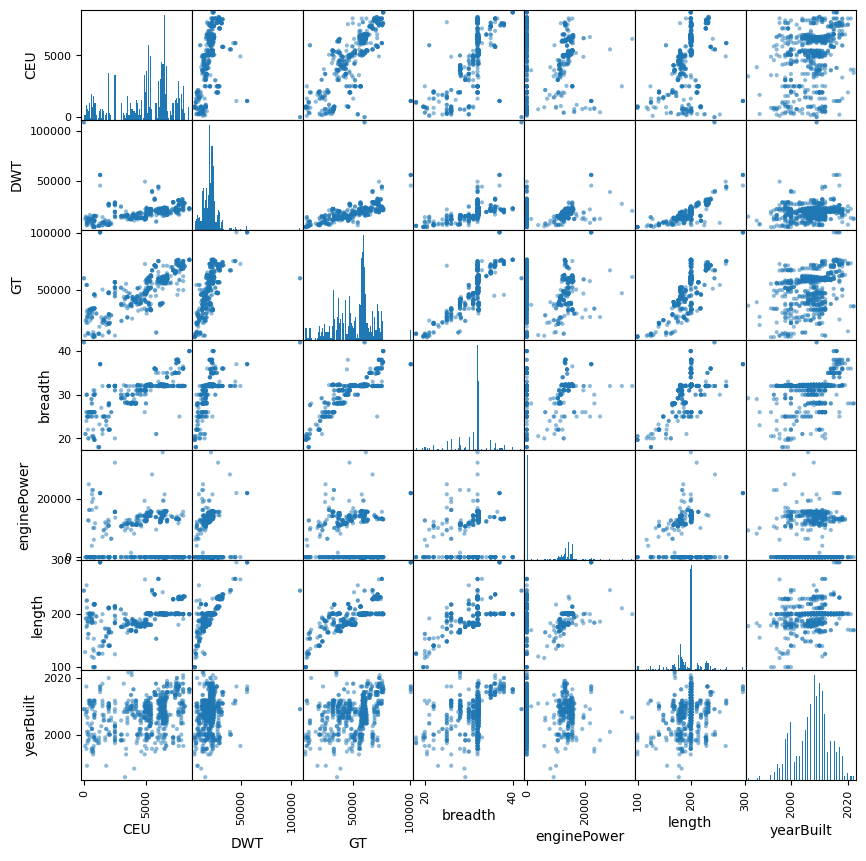

In [11]:
scatter_matrix(
    vessels_df[["CEU", "DWT", "GT", "breadth", "enginePower", "length", "yearBuilt"]],
    figsize=(10, 10),
    hist_kwds={"bins": 100},
)
plt.show()

#### Impute missing values

In [40]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from category_encoders.one_hot import OneHotEncoder

In [41]:
estimator = BayesianRidge()
imputer = IterativeImputer(estimator=estimator, max_iter=25)
one_hot = OneHotEncoder(cols=["vesselType"], handle_missing="value")

test = imputer.fit_transform(
    one_hot.fit_transform(
        vessels_df[
            [
                "CEU",
                "DWT",
                "GT",
                "vesselType",
                "breadth",
                "enginePower",
                "length",
                "yearBuilt",
            ]
        ]
    )
)

In [48]:
one_hot.feature_names_out_

['CEU',
 'DWT',
 'GT',
 'vesselType_1',
 'vesselType_2',
 'vesselType_3',
 'vesselType_4',
 'breadth',
 'enginePower',
 'length',
 'yearBuilt']

<Axes: ylabel='Frequency'>

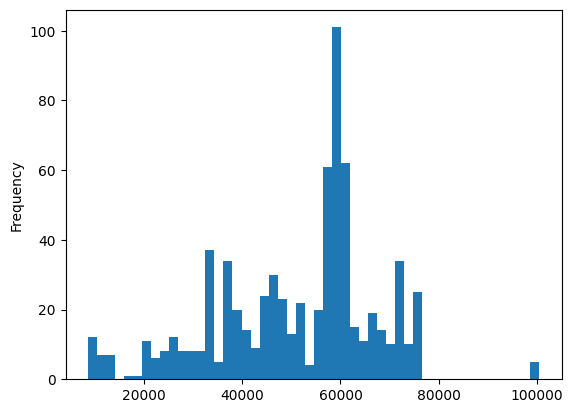

In [64]:
vessels_df["GT"].plot.hist(bins=50)

In [55]:
filled = one_hot.inverse_transform(
    pd.DataFrame(
        data=test,
        columns=one_hot.feature_names_out_,
    )
)